# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
#!pip install --upgrade numpy==1.26.4
#!pip install --upgrade pandas==2.2.2
#pip install --upgrade nltk==3.9.1
#!pip install --upgrade spacy==3.7.5
#!pip install --upgrade scipy==1.12
#!pip install --upgrade pydantic==2.10.5
#!pip install wordcloud==1.9.4
#!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

from wordcloud import WordCloud 
from sklearn.metrics import classification_report


In [3]:
## Change the display properties of pandas to max
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
data_true = pd.read_csv("true.csv")
# Import the second file - Fake.csv
data_false = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
data_true.head(5)

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
data_false.head(5)

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [7]:
# Print the column details for True News DataFrame
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Print the column details for Fake News Dataframe
data_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [9]:
# Print the column names of both DataFrames
data_true.columns, data_false.columns

(Index(['title', 'text', 'date'], dtype='object'),
 Index(['title', 'text', 'date'], dtype='object'))

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
data_true['class']=1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
data_false["class"]=0

In [ ]:
#Check the data if it has properly imported
data_true.head(5)

,title,text,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
data_merged = pd.concat([data_true,data_false], ignore_index=True)
data_merged = data_merged.sample(frac=1).reset_index(drop=True) # Merging the data into a random order

In [13]:
# Display the first 5 rows of the combined DataFrame to verify the result
data_merged.head(5)

,title,text,date,class
0,United Just Took A DISGUSTING Step To Smear T...,United Airlines is in an economic and pulic re...,"April 11, 2017",0
1,SETH RICH MURDER Has CHILLING SIMILARITIES To ...,Just two months shy of the one-year anniversar...,"May 16, 2017",0
2,Clinton: My worries are not the same as black ...,"CHARLOTTE, N.C. (Reuters) - Hillary Clinton to...","October 2, 2016",1
3,France's Macron says received no request to ho...,DUBAI (Reuters) - French President Emmanuel Ma...,"November 9, 2017",1
4,WAY TO GO! Sarah Sanders Shuts Down Black Repo...,SARAH SANDERS does a fantastic job shutting do...,"Sep 29, 2017",0


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [14]:
# Check Presence of Null Values
data_merged.isnull().sum()

title    21
text     21
date     42
class     0
dtype: int64

Since there is null data Dropping the null values

In [15]:
# Handle Rows with Null Values
data_merged = data_merged.dropna()

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
data_merged['news_text'] = data_merged['title'] + " " + data_merged['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
data_merged = data_merged.drop(['title', 'text','date'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
data_merged.head(5)

,class,news_text
0,0,United Just Took A DISGUSTING Step To Smear T...
1,0,SETH RICH MURDER Has CHILLING SIMILARITIES To ...
2,1,Clinton: My worries are not the same as black ...
3,1,France's Macron says received no request to ho...
4,0,WAY TO GO! Sarah Sanders Shuts Down Black Repo...


In [18]:
data_merged = data_merged[['news_text','class']]

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [20]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(columns=['news_text'])
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = " "


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements
def wordcleaning(text):
    text = text.lower() # Convert to lower case
    text = re.sub('\[.*?\]','',text) # Remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # Remove punctuation
    text = re.sub('\w*\d\w*','',text) # Remove words with numbers
    text = re.sub(r'\s+', ' ', text).strip() #Removing any bank spaces 
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [22]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean = data_merged["news_text"].apply(wordcleaning)

In [23]:
df_clean.head(10)

0    united just took a disgusting step to smear th...
1    seth rich murder has chilling similarities to ...
2    clinton my worries are not the same as black g...
3    frances macron says received no request to hos...
4    way to go sarah sanders shuts down black repor...
5    trump’s ineptitude causes huge drop in investm...
6    argentina faces hope and hopelessness in subma...
7    donald rumseld humiliates “the view” dingbat j...
8    list of mayors in us cities who have asked oba...
9    hillary clinton says half her cabinet will be ...
Name: news_text, dtype: object

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [24]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def extract_nouns_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_stop]

In [ ]:
nouns_series = df_clean.apply(extract_nouns_spacy) #Applying the Exactation of nouns in a diiferent series for better visibility

In [26]:
nouns_series.head(5)

0    [step, victim, heart, viral, relation, tailspi...
1    [murder, similarity, body, count, victim, mont...
2    [worry, grandmother, church, grandchild, world...
3    [france, request, hariri, contact, prime, mini...
4    [way, sander, shut, reporter, anthem, race, sa...
Name: news_text, dtype: object

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
#Creating a new dataframe and storing all the values inside one dataframe
 df_clean = pd.DataFrame(df_clean) # Store it in a separate column in the new DataFrame
df_clean.columns = ["news_text",]
df_clean['class']= data_merged['class']
df_clean['nouns'] = nouns_series  # Apply POS tagging and lemmatization function to cleaned text
df_clean.head(5)

In [31]:
df_clean.head(5)

,news_text,class,nouns
0,united just took a disgusting step to smear th...,0,"[step, victim, heart, viral, relation, tailspi..."
1,seth rich murder has chilling similarities to ...,0,"[murder, similarity, body, count, victim, mont..."
2,clinton my worries are not the same as black g...,1,"[worry, grandmother, church, grandchild, world..."
3,frances macron says received no request to hos...,1,"[france, request, hariri, contact, prime, mini..."
4,way to go sarah sanders shuts down black repor...,0,"[way, sander, shut, reporter, anthem, race, sa..."


### Save the Cleaned data as a csv file (Recommended)

In [32]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)


In [33]:
df_clean = pd.read_csv("clean_df.csv")

In [34]:
# Check the first few rows of the DataFrame
df_clean.head(5)

,news_text,class,nouns
0,united just took a disgusting step to smear th...,0,"['step', 'victim', 'heart', 'viral', 'relation..."
1,seth rich murder has chilling similarities to ...,0,"['murder', 'similarity', 'body', 'count', 'vic..."
2,clinton my worries are not the same as black g...,1,"['worry', 'grandmother', 'church', 'grandchild..."
3,frances macron says received no request to hos...,1,"['france', 'request', 'hariri', 'contact', 'pr..."
4,way to go sarah sanders shuts down black repor...,0,"['way', 'sander', 'shut', 'reporter', 'anthem'..."


In [35]:
# Check the dimensions of the DataFrame
df_clean.shape


(44898, 3)

In [36]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()


news_text    9
class        0
nouns        0
dtype: int64

In [37]:
df_clean = df_clean.dropna(subset=['news_text'])

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [38]:
y = df_clean['class']


In [42]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split 


x_train,x_test,y_train,y_test = train_test_split(df_clean,y,test_size=0.3)

Here the X_train & X_test has the values of class as they are useful for Data visulization and will be removed before training the module 

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
x_train['C_length'] = x_train['news_text'].astype(str).apply(len)

In [ ]:
x_train['C_length'].max()

31348

In [46]:
print(x_train.isnull().sum())

news_text    0
class        0
nouns        0
C_length     0
dtype: int64


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

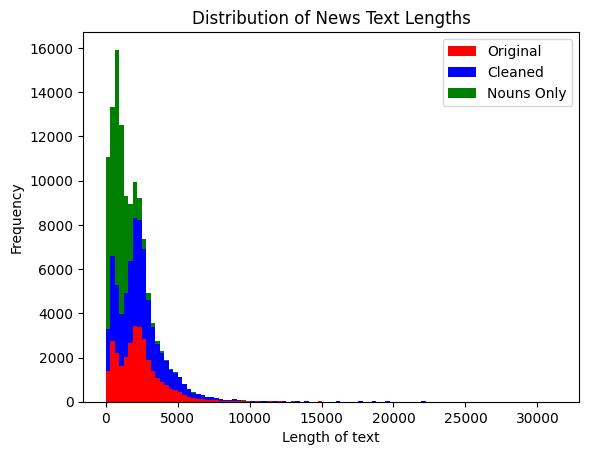

In [47]:
# Create a histogram plot to visualise character lengths
df_clean['text_length'] = df_clean['news_text'].apply(lambda x: len(str(x)))
nouns_series['text_length'] = nouns_series.apply(lambda x: len(str(x)))

data = [x_train['C_length'], df_clean['text_length'], nouns_series['text_length']]
# Add histogram for cleaned news text & lemmatized text
plt.hist(data, bins=100, stacked=True, color=['red', 'blue', 'green'], label=['Original', 'Cleaned', 'Nouns Only'])

#Adding legends 
plt.title('Distribution of News Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


          Word  Frequency
0         said      68826
1        trump      33136
2           us      31248
3        would      22053
4      reuters      19789
5    president      18123
6        state      13462
7   government      12742
8       states      12454
9          new      12234
10       house      12223
11  republican      11182
12        also      11157
13      united      10811
14      people      10521
15        told       9863
16       could       9649
17         one       8870
18        last       8844
19      trumps       8714
20  washington       8538
21    election       8375
22         two       8291
23       party       8060
24      former       7587
25       north       7488
26    campaign       7479
27        year       7382
28      donald       7319
29    security       7210
30       white       7051
31     percent       7002
32       court       6938
33      senate       6740
34    minister       6301
35       first       6053
36   officials       6053
37       chi

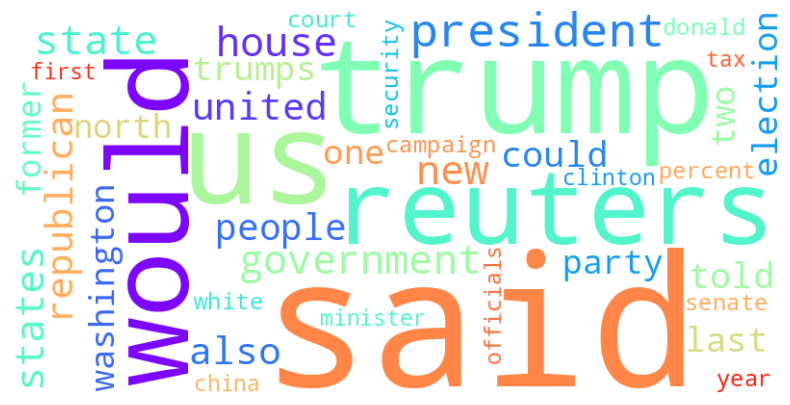

In [48]:
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
df_class1 = x_train[x_train['class'] == 1]
all_text = ' '.join(df_class1['news_text'].dropna()) # combing text for creating a unified list
all_text = all_text.lower() # making al text lower 
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text) #removing special characters in case 
words = all_text.split() # Splitting Text into words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
word_counts = Counter(words) 
top_40 = word_counts.most_common(40)
top_40_df = pd.DataFrame(top_40, columns=['Word', 'Frequency'])
print(top_40_df)


# Generate word cloud for True News
top_40_dict = dict(top_40)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rainbow').generate_from_frequencies(top_40_dict)

# Plot the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


          Word  Frequency
0        trump      56570
1         said      21755
2       people      18516
3    president      18416
4        would      16545
5          one      16215
6           us      15775
7        obama      13646
8      clinton      13087
9         like      12604
10      donald      12561
11     hillary      10662
12        also      10456
13         new      10449
14        news      10120
15        even       9581
16       white       9473
17        time       9025
18       state       8944
19         via       7835
20       house       7718
21       video       7708
22       media       7695
23         get       7668
24     america       7620
25    campaign       7458
26        know       7386
27       first       7202
28       could       7170
29       going       7107
30    american       6932
31       image       6864
32        many       6719
33      states       6638
34        make       6635
35  republican       6622
36        told       6426
37        ma

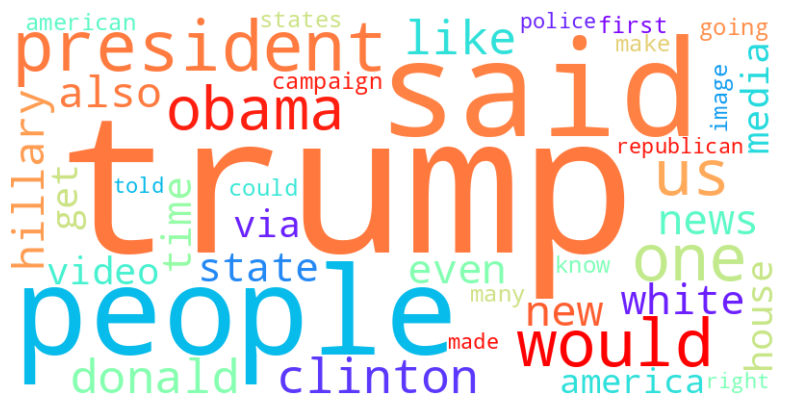

In [49]:
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
df_class1 = x_train[x_train['class'] == 0]
all_text = ' '.join(df_class1['news_text'].dropna()) # combing text for creating a unified list
all_text = all_text.lower() # making al text lower 
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text) #removing special characters in case 
words = all_text.split() # Splitting Text into words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
word_counts = Counter(words) 
top_40 = word_counts.most_common(40)
top_40_df = pd.DataFrame(top_40, columns=['Word', 'Frequency'])
print(top_40_df)


# Generate word cloud for Fake News
top_40_dict = dict(top_40)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rainbow').generate_from_frequencies(top_40_dict)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [50]:
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def plt_top10_ngrams(df, n=1, top_k=10, remove_stopwords=True, use_lemma=False):
    texts = df[df['class'] == 1]['news_text'].dropna().astype(str)
    ngram_counter = Counter()
    
    for text in texts:
        doc = nlp(text)
        tokens = []
        for token in doc:
            if token.is_punct or token.is_space:
                continue
            if remove_stopwords and token.is_stop:
                continue
            tokens.append(token.lemma_.lower() if use_lemma else token.text.lower())
        
        ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]
        ngram_counter.update(ngrams)

    top_ngrams = ngram_counter.most_common(top_k)

    # Print n-grams
    for gram, freq in top_ngrams:
        print(f"{' '.join(gram)}: {freq}")

    # Plot
    labels = [' '.join(gram) for gram, _ in top_ngrams]
    counts = [freq for _, freq in top_ngrams]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='seagreen')
    plt.title(f"Top {top_k} {n}-grams in True News")
    plt.xlabel(f"{n}-grams")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [51]:
# Handle NaN values in the text data
x_train = x_train.dropna(subset=['news_text'])

In [52]:
x_train.isnull().sum()

news_text    0
class        0
nouns        0
C_length     0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

said: 68826
trump: 41317
s: 31001
reuters: 19789
president: 18759
state: 14164
government: 12964
house: 12325
new: 12234
states: 11754


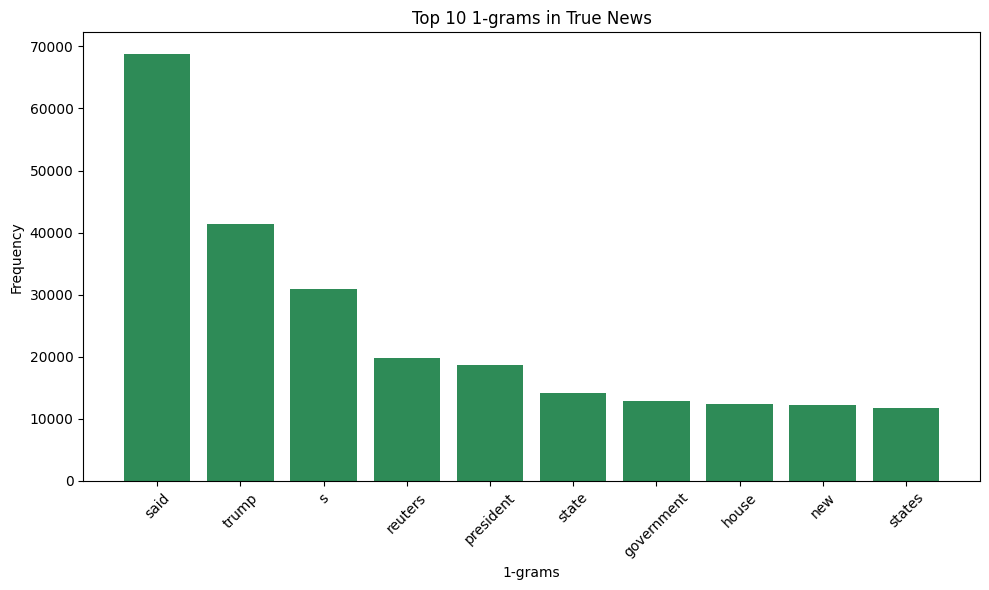

In [53]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
plt_top10_ngrams(x_train, n=1, top_k=10)

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



united states: 8469
donald trump: 7105
white house: 6278
washington reuters: 4532
north korea: 4395
president donald: 4131
new york: 3154
prime minister: 2865
said statement: 2814
islamic state: 2552


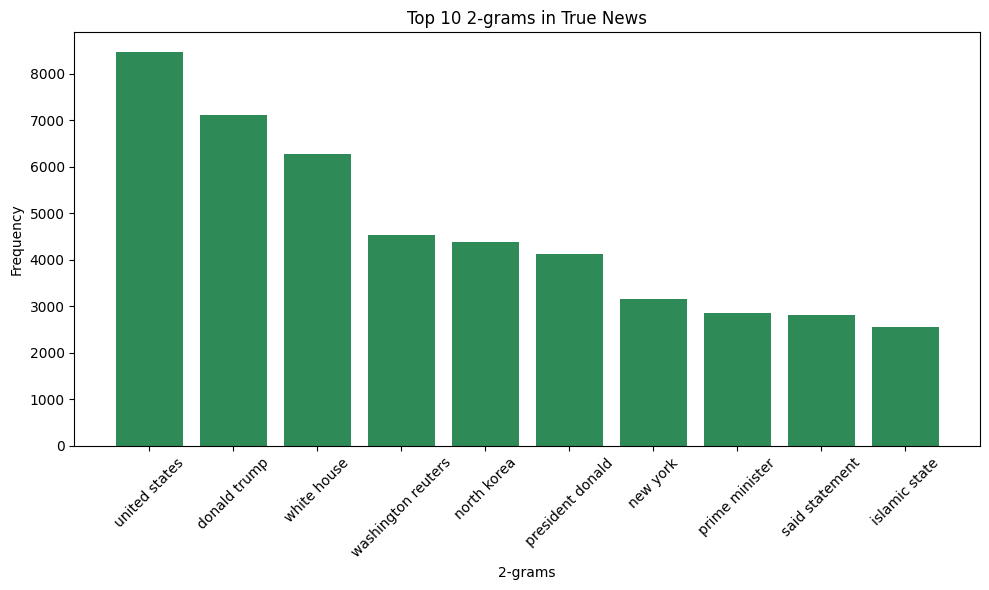

In [54]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
plt_top10_ngrams(x_train, n=2, top_k=10)

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



president donald trump: 4089
president barack obama: 1987
reuters president donald: 1085
washington reuters president: 935
white house said: 654
presidentelect donald trump: 576
north korea s: 575
president vladimir putin: 545
new york reuters: 511
george w bush: 466


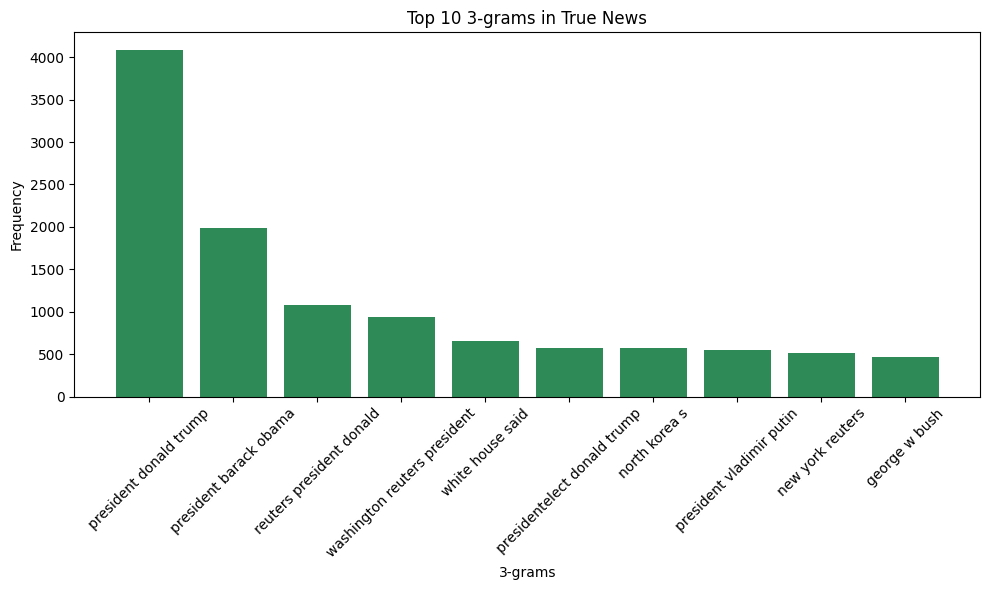

In [55]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
plt_top10_ngrams(x_train, n=3, top_k=10)

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [56]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
def plt_top10_ngrams_fake(df, n=1, top_k=10, remove_stopwords=True, use_lemma=False):
    texts = df[df['class'] == 0]['news_text'].dropna().astype(str)
    ngram_counter = Counter()
    
    for text in texts:
        doc = nlp(text)
        tokens = []
        for token in doc:
            if token.is_punct or token.is_space:
                continue
            if remove_stopwords and token.is_stop:
                continue
            tokens.append(token.lemma_.lower() if use_lemma else token.text.lower())
        
        ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]
        ngram_counter.update(ngrams)

    top_ngrams = ngram_counter.most_common(top_k)

    # Print n-grams
    for gram, freq in top_ngrams:
        print(f"{' '.join(gram)}: {freq}")

    # Plot
    labels = [' '.join(gram) for gram, _ in top_ngrams]
    counts = [freq for _, freq in top_ngrams]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='Red')
    plt.title(f"Top {top_k} {n}-grams in False News")
    plt.xlabel(f"{n}-grams")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

said: 68826
trump: 41317
s: 31001
reuters: 19789
president: 18759
state: 14164
government: 12964
house: 12325
new: 12234
states: 11754


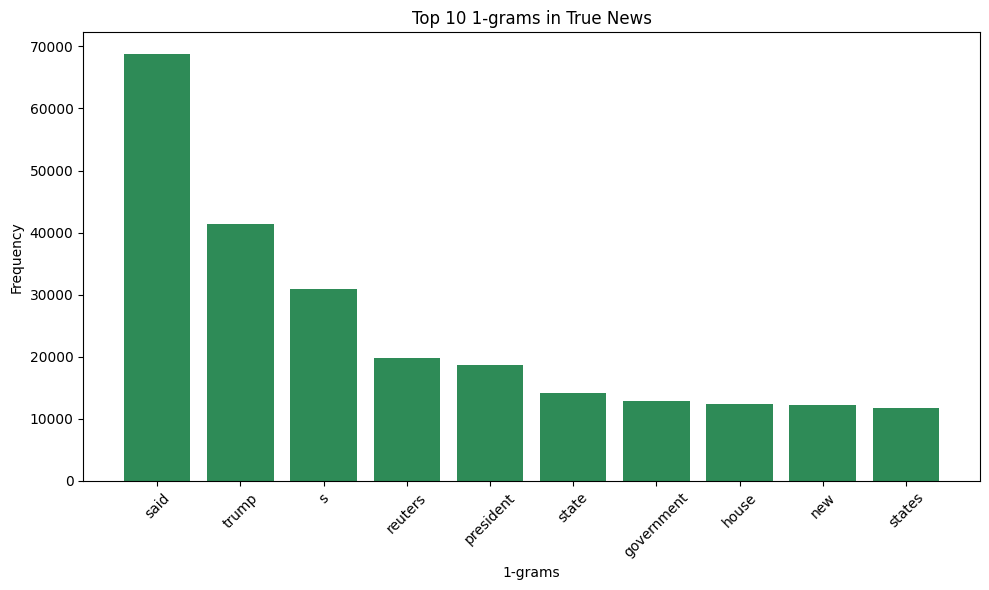

In [57]:
plt_top10_ngrams(x_train, n=1, top_k=10)

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



united states: 8469
donald trump: 7105
white house: 6278
washington reuters: 4532
north korea: 4395
president donald: 4131
new york: 3154
prime minister: 2865
said statement: 2814
islamic state: 2552


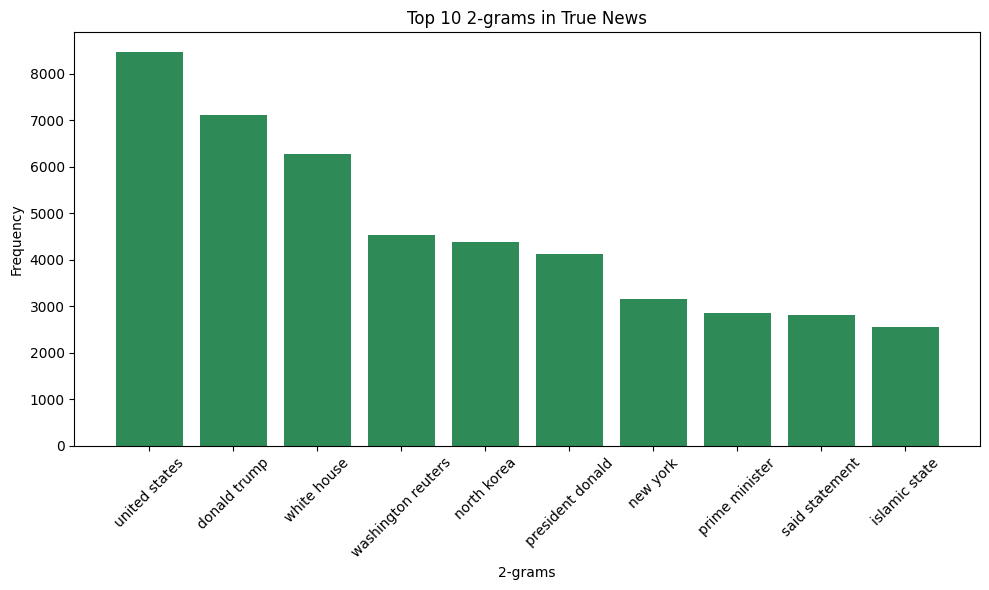

In [58]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
plt_top10_ngrams(x_train, n=2, top_k=10)

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



president donald trump: 4089
president barack obama: 1987
reuters president donald: 1085
washington reuters president: 935
white house said: 654
presidentelect donald trump: 576
north korea s: 575
president vladimir putin: 545
new york reuters: 511
george w bush: 466


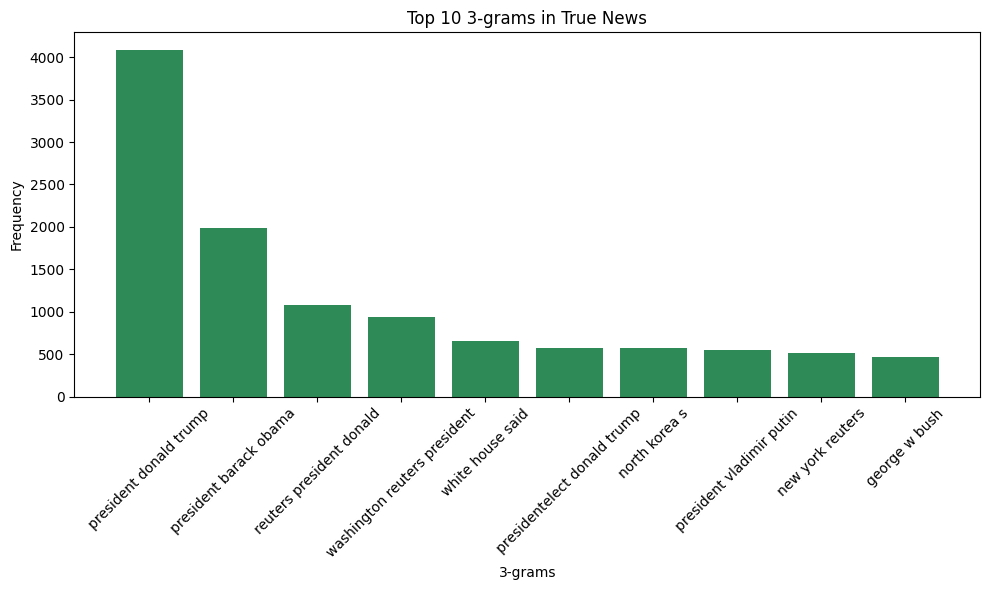

In [59]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
plt_top10_ngrams(x_train, n=3, top_k=10)

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [60]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [61]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [62]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [63]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [64]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [65]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [66]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [67]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [68]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [69]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [70]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [71]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [72]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [73]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def document_vector(text, model, vector_size=300):
    
    tokens = [token.text.lower() for token in nlp(text) if not token.is_punct and not token.is_space]
    valid_tokens = [t for t in tokens if t in model]

    if not valid_tokens:
        return np.zeros(vector_size)  # Return zero-vector if no known words
    
    word_vectors = [model[t] for t in valid_tokens]
    return np.mean(word_vectors, axis=0)

def get_dataset_vectors(text_series, model, vector_size=300):
    """Convert a series of texts to their Word2Vec document vectors."""
    vectors = []
    for text in text_series:
        if not isinstance(text, str):
            continue  # Skip non-string rows
        vectors.append(document_vector(text, model, vector_size))
    return np.vstack(vectors)

## Extract the target variable for the training data and validation data


In [74]:
x_train_clean = x_train['news_text']
x_test_clean = x_test['news_text']

In [75]:
train_vectors = get_dataset_vectors(x_train_clean, word2vec_model)


In [76]:
test_vectors = get_dataset_vectors(x_test_clean, word2vec_model)

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [78]:
# Dropping the Class column and training the modules 
x_train = x_train.drop(columns='class')
x_test = x_test.drop(columns='class')

In [82]:
## Initialise Logistic Regression model
logreg = LogisticRegression()
## Train Logistic Regression model on training data

import statsmodels.api as sm

logml = sm.GLM(y_train,(sm.add_constant(train_vectors)),family =sm.families.Binomial())
## Predict on validation data
logml = logml.fit()
logml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  class   No. Observations:                31422
Model:                            GLM   Df Residuals:                    31121
Model Family:                Binomial   Df Model:                          300
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2093.2
Date:                Wed, 30 Apr 2025   Deviance:                       4186.5
Time:                        15:50:04   Pearson chi2:                 1.66e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7137
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7334      4.746      6.265      0.000      20.431      39.036
x1            -9.4991      4.331     -2.193      0.028     -17.988      -1.010
x2             2.9168      4.653      0.627      0.531      -6.202      12.036
x3            35.4834      4.589      7.733      0.000      26.490      44.477
x4           -16.2977      4.375     -3.725      0.000     -24.873      -7.722
x5             2.1150      4.705      0.450      0.653      -7.107      11.337
x6            17.1104      4.421      3.870      0.000       8.445      25.776
x7            10.4177      4.445      2.344      0.019       1.706      19.129
x8           -12.8543      4.588     -2.802      0.005     -21.846      -3.862
x9            -7.4971      4.456     -1.683      0.092     -16.230       1.236
x10            7.5254      5.008      1.503      0.133      -2.290      17.341
x11           26.5573      4.516      5.881      0.000      17.707      35.408
x12           13.9576      4.666      2.991      0.003       4.812      23.103
x13          -15.9343      4.679     -3.405      0.001     -25.106      -6.763
x14            2.5593      4.547      0.563      0.574      -6.354      11.472
x15            3.2674      4.221      0.774      0.439      -5.005      11.540
x16           -7.4259      4.632     -1.603      0.109     -16.504       1.652
x17           32.1711      4.265      7.543      0.000      23.812      40.530
x18           11.9457      4.148      2.880      0.004       3.816      20.075
x19            6.7650      4.563      1.483      0.138      -2.178      15.708
x20          -12.0289      4.516     -2.663      0.008     -20.881      -3.177
x21          -28.3599      4.177     -6.790      0.000     -36.546     -20.174
x22          -33.8593      4.391     -7.711      0.000     -42.466     -25.253
x23           15.2983      4.289      3.567      0.000       6.892      23.704
x24            3.7285      4.227      0.882      0.378      -4.557      12.014
x25           -8.0674      4.365     -1.848      0.065     -16.623       0.488
x26          -35.0045      4.474     -7.823      0.000     -43.774     -26.235
x27           26.7665      4.671      5.730      0.000      17.612      35.921
x28           -4.5739      4.695     -0.974      0.330     -13.776       4.628
x29          -12.2743      4.535     -2.707      0.007     -21.162      -3.386
x30           14.4107      4.518      3.190      0.001       5.557      23.265
x31          -15.5540      4.349     -3.576      0.000     -24.078      -7.030
x32            3.3272      4.481      0.743      0.458      -5.455      12.109
x33           10.4639      4.439      2.357      0.018       1.764      19.164
x34           -4.1533      4.597     -0.903      0.366     -13.164       4.857
x35            0.5847      4.251      0.138      0.891      -7.748       8.917
x3

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [83]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_test_with_constant = sm.add_constant(test_vectors)

# Make predictions
y_pred_probs = logml.predict(X_test_with_constant)
y_pred_log = (y_pred_probs > 0.5).astype(int)


In [94]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print(accuracy_log)

0.974456077819856


In [84]:
# Classification Report
log_Scrore = classification_report(y_test, y_pred_log)
print(log_Scrore)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7012
           1       0.97      0.98      0.97      6455

    accuracy                           0.97     13467
   macro avg       0.97      0.97      0.97     13467
weighted avg       0.97      0.97      0.97     13467



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [85]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
## Train Decision Tree model on training data

grid_search.fit(train_vectors, y_train)
best_dt = grid_search.best_estimator_

Fitting 4 folds for each of 30 candidates, totalling 120 fits


In [86]:
## Predict on validation data
y_train_pred = best_dt.predict(train_vectors)
y_pred_dt = best_dt.predict(test_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [95]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import classification_report
dt_Scrore_dt = classification_report(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [96]:
# Classification Report
print(dt_Scrore_dt)
print(accuracy_dt)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7012
           1       0.89      0.88      0.89      6455

    accuracy                           0.89     13467
   macro avg       0.89      0.89      0.89     13467
weighted avg       0.89      0.89      0.89     13467

0.8921066310239846


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [89]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
## Train Random Forest model on training data
grid_search.fit(train_vectors, y_train)
rf_best = grid_search.best_estimator_
rf_best
## Predict on validation data


Fitting 4 folds for each of 120 candidates, totalling 480 fits


RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       oob_score=True, random_state=100)

In [90]:
y_train_pred_rf = rf_best.predict(train_vectors)
y_pred_rf = rf_best.predict(test_vectors)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [91]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

dt_Scrore_dt = classification_report(y_test, y_pred_rf)

In [92]:
# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7012
           1       0.94      0.94      0.94      6455

    accuracy                           0.95     13467
   macro avg       0.94      0.95      0.94     13467
weighted avg       0.95      0.95      0.95     13467



the best Module to choose from the above 3 is Logistic regression as it gives a accuracy of 0.97 and the precionj is also good which will help in giving accurate results 

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

the best Module to choose from the above 3 is Logistic regression as it gives a accuracy of 0.97 and the precionj is also good which will help in giving accurate results 

The semantic classification helped in converting the meaning of the words and understanding the news is fake or true news and the vectorization helped in converting text into vectors ie numnericals 